In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('Final1302.csv',encoding='windows-1252')#had some decode error. so used encoding
df

,myId,id,filename,title,text,label_text,label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,Fake,0
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,Real,1
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,Real,1
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,Fake,0
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,Fake,0
...,...,...,...,...,...,...,...
1297,3104,2987,1_fake_new_dataset_3120,Twinbrook ‘pausing’ COVID-19 plan after criticism,"Apr 24, 2020 at 4:31 PM Nursing home faced bac...",Fake,0
1298,3110,2993,1_fake_new_dataset_3120,"Experts suggest ventilation, not isolation is ...",The Coronavirus epidemic for the first time re...,Fake,0
1299,3111,2994,1_fake_new_dataset_3120,Corona virus and pentagon Quarantine help? Com...,Here is the technique we use to heal unseen ne...,Fake,0
1300,3118,3001,1_fake_new_dataset_3120,Characterizing Patients Hospitalized With COVI...,Characterizing Patients Hospitalized With COVI...,Fake,0


In [4]:
df=pd.read_csv('Final1302.csv',encoding='windows-1252')
conversion_dict={0:'False',1:'True'}
df['label']=df['label'].replace(conversion_dict)#Replace 1,0 to real and fake
df

,myId,id,filename,title,text,label_text,label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,Facebook has shuttered a popular group for Mic...,Fake,False
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,We can now officially put to rest all comparis...,Real,True
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,The Ministry of Health in Bermuda has confirme...,Real,True
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,Locking down much of the country may have help...,Fake,False
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,The New York Times has published an article by...,Fake,False
...,...,...,...,...,...,...,...
1297,3104,2987,1_fake_new_dataset_3120,Twinbrook ‘pausing’ COVID-19 plan after criticism,"Apr 24, 2020 at 4:31 PM Nursing home faced bac...",Fake,False
1298,3110,2993,1_fake_new_dataset_3120,"Experts suggest ventilation, not isolation is ...",The Coronavirus epidemic for the first time re...,Fake,False
1299,3111,2994,1_fake_new_dataset_3120,Corona virus and pentagon Quarantine help? Com...,Here is the technique we use to heal unseen ne...,Fake,False
1300,3118,3001,1_fake_new_dataset_3120,Characterizing Patients Hospitalized With COVI...,Characterizing Patients Hospitalized With COVI...,Fake,False


In [5]:
#Check the balance of the data
df.label.value_counts()#Not balanced. Have to find a way to solve this

False    651
True     651
Name: label, dtype: int64

In [6]:
import string
import re
def word_drop(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W","",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w"\d\w"','',text)
    return text

In [7]:
df["text"]=df["text"].apply(word_drop)

In [8]:
df.head(5)

,myId,id,filename,title,text,label_text,label
0,1,0,1_fake_new_dataset_3120,FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...,facebookhasshutteredapopulargroupformichigande...,Fake,False
1,2,1,1_fake_new_dataset_3120,Other Viewpoints: COVID-19 is worse than the flu,wecannowofficiallyputtorestallcomparisonsofcov...,Real,True
2,3,2,1_fake_new_dataset_3120,Bermuda's COVID-19 cases surpass 100,theministryofhealthinbermudahasconfirmedanewsp...,Real,True
3,5,4,1_fake_new_dataset_3120,THE HIGH COST OF LOCKING DOWN AMERICA: “WE’VE ...,lockingdownmuchofthecountrymayhavehelpedtoflat...,Fake,False
4,6,5,1_fake_new_dataset_3120,NY TIMES WORRIES HALF OF AMERICANS WILL REFUSE...,thenewyorktimeshaspublishedanarticlebypopulara...,Fake,False


In [9]:
X_train, X_test,y_train, y_test=train_test_split(df['text'],df['label'],test_size=0.25,random_state=9,shuffle=True)

In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.75)

In [11]:
vec_train=tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
vec_test=tfidf_vectorizer.transform(X_test.values.astype('U'))

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(vec_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [13]:
y_pred=knn.predict(vec_test)
score=accuracy_score(y_test,y_pred)
print(f'PAC Accuracy: {round(score*100,2)}%')

PAC Accuracy: 52.15%


In [14]:
#Or
knn.score(vec_test,y_test)

0.5214723926380368

In [15]:
#Can use gridSearchCV or Kfold crossvalidation to change the k value and get the optimal value

In [16]:
cm=confusion_matrix(y_test,y_pred, labels=['True','False'])
cm

array([[  0, 156],
       [  0, 170]], dtype=int64)

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(33.22222222222222, 0.5, 'Actual')

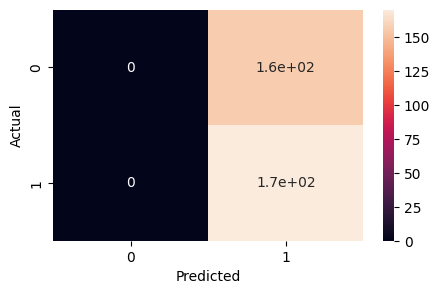

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.52      1.00      0.69       170
        True       0.00      0.00      0.00       156

    accuracy                           0.52       326
   macro avg       0.26      0.50      0.34       326
weighted avg       0.27      0.52      0.36       326



C:\Users\thiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\thiya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [20]:
df_true=pd.read_csv('Real.csv',encoding='windows-1252')
df_fake=pd.read_csv('Fake.csv',encoding='windows-1252')
df_final=pd.concat([df_true,df_fake])

FileNotFoundError: [Errno 2] No such file or directory: 'Real.csv'

In [21]:
def find_label(newtext):
    vec_newtext=tfidf_vectorizer.transform([newtext])
    y_pred=knn.predict(vec_newtext)
    return y_pred[0]

In [ ]:
find_label((df_true['text'][0]))#predicting true news as false

In [ ]:
find_label((df_fake['text'][0]))

In [ ]:
sum([1 if find_label((df_true['text'][i]))=='True' else 0 for i in range(len(df_true['text']))])/df_true['text'].size

In [ ]:
sum([1 if find_label((df_fake['text'][i]))=='false' else 0 for i in range(len(df_fake['text']))])/df_fake['text'].size

In [ ]:
#Only 24% times the model predicts the actual results as true for the unknown dataset which all the news are true
#Only 21% times the model predicts the actual results as true for the unknown dataset which all the news are false

In [22]:
X_test.values

array(['the2019novelcoronavirusisanewvirusthatcausesrespiratoryillnessinpeopleandcanspreadfrompersontopersontheillnesswasfirstidentifiedduringaninvestigationintoanoutbreakinwuhanchinacurrentlythereisnovaccinetoprotectagainst2019ncovthevirusseemstobeabletospreadfrompersontopersonbutitsnotclearhoweasilythishappensasofnowthevirusdoesnotseemtobespreadingintheunitedstatesbutifyouwereinchinawithinthepast14daysandfeelsickwiththesesymptomsincludingfevercoughordifficultybreathingyoushouldgetmedicalattentionalsomanypatientshavepneumoniainbothlungsthefirstcaseofthevirusshowingupintheunitedstateswasreportedonjanuary212020',
       'thecoronavirushasnothingtodowithcoronabeerofcoursebutgooglesearchesforcoronavirusbeerandbeervirushavenonethelessspikedinrecentdaysaccordingtogoogletrendsandwhiletheapparentconfusionhasnthurtsalesthebuzzhasbeenenoughforconstellationbrandsthecompanythatmakescoronatofeelcompelledtostatewhatshouldbeobviousourconsumersbyandlargeunderstandthattheresnolinkagebetweenthevirusand

In [23]:
X_test

709     the2019novelcoronavirusisanewvirusthatcausesre...
223     thecoronavirushasnothingtodowithcoronabeerofco...
666     googlesearchtrendsillustratethatweresurrounded...
109     a32yearoldwomanfromwuhaninchinawasdetectedwith...
2       theministryofhealthinbermudahasconfirmedanewsp...
                              ...                        
16      chennaidehraduntwomorecovid19positivecasessurf...
1121    mdharrisinstitutearticleindexbycategorybebless...
927     coronavirusayushccrhandhomeopathyletusbeginwit...
1246    nowaviruscalledthecoronavirushasbecomeverydang...
1071    yesinthecityofsternbergfarsouthofbavariaonthes...
Name: text, Length: 326, dtype: object

In [30]:
vec_test1=tfidf_vectorizer.transform(['The 2019 novel coronavirus is a new virus that causes respiratory illness in people and can spread from person-to -person. The illness was first identified during an investigation into an outbreak in Wuhan, China. Currently there is no vaccine to protect against 2019-nCov. The virus seems to be able to spread from person to person but its not clear how easily this happens.As of now the virus does not seem to be spreading in the United States, but if you were in china within the past 14 days and feel sick with these symptoms including fever, cough, or difficulty breathing you should get medical attention. Also many patients have pneumonia in both lungs .The first case of the virus showing up in the United States was reported on January 21, 2020.'])
y_pred=knn.predict(vec_test1)
y_pred

array(['False'], dtype=object)

In [28]:
vec_test1=tfidf_vectorizer.transform(['The 2019 novel coronavirus is a new virus that causes respiratory illness in people and can spread from person-to -person. The illness was first identified during an investigation into an outbreak in Wuhan, China. Currently there is no vaccine to protect against 2019-nCov. The virus seems to be able to spread from person to person but its not clear how easily this happens.As of now the virus does not seem to be spreading in the United States, but if you were in china within the past 14 days and feel sick with these symptoms including fever, cough, or difficulty breathing you should get medical attention. Also many patients have pneumonia in both lungs .The first case of the virus showing up in the United States was reported on January 21, 2020.'])
y_pred=knn.predict(vec_test1)
y_pred

array(['False'], dtype=object)

In [27]:
vec_test1=tfidf_vectorizer.transform(['The 2019 novel coronavirus is a new virus that causes respiratory illness in people and can spread from person-to -person. The illness was first identified during an investigation into an outbreak in Wuhan, China. Currently there is no vaccine to protect against 2019-nCov. The virus seems to be able to spread from person to person but its not clear how easily this happens.As of now the virus does not seem to be spreading in the United States, but if you were in china within the past 14 days and feel sick with these symptoms including fever, cough, or difficulty breathing you should get medical attention. Also many patients have pneumonia in both lungs .The first case of the virus showing up in the United States was reported on January 21, 2020.'])
y_pred=knn.predict(vec_test1)
y_pred

array(['False'], dtype=object)